You can download the `requirements.txt` for this course from the workspace of this lab. `File --> Open...`

# L2: Create Agents to Research and Write an Article

In this lesson, you will be introduced to the foundational concepts of multi-agent systems and get an overview of the crewAI framework.

This notebook was taken from the course

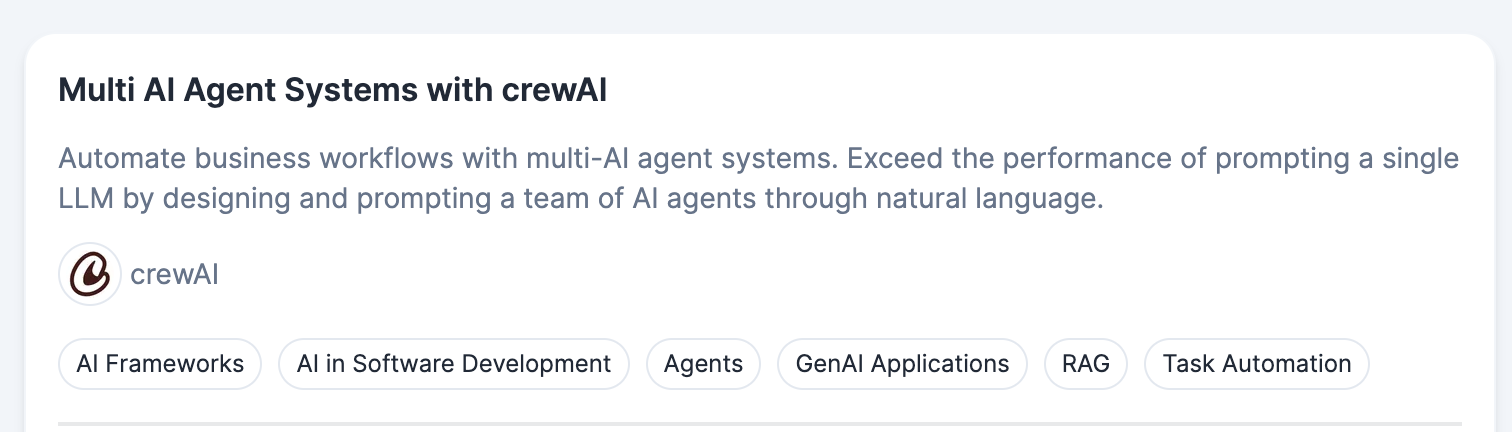 on [Deeplearning.ai CrewAI Course](https://learn.deeplearning.ai/)

The libraries are already installed in the classroom. If you're running this notebook on your own machine, you can install the following:
```Python
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29
```

In [1]:
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29 packaging

In [2]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

- Import from the crewAI libray.

In [3]:
from crewai import Agent, Task, Crew

2024-12-18 23:36:52,137 [embedchain] [INFO] Swapped std-lib sqlite3 with pysqlite3 for ChromaDb compatibility. Your original version was 3.31.1.


- As a LLM for your agents, you'll be using OpenAI's `gpt-3.5-turbo`.

**Optional Note:** crewAI also allow other popular models to be used as a LLM for your Agents. You can see some of the examples at the [bottom of the notebook](#1).

In [4]:
import os
from utils import get_openai_api_key

openai_api_key = get_openai_api_key()
os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'

## Creating Agents

- Define your Agents, and provide them a `role`, `goal` and `backstory`.
- It has been seen that LLMs perform better when they are role playing.

### Agent: Planner

**Note**: The benefit of using _multiple strings_ :
```Python
varname = "line 1 of text"
          "line 2 of text"
```

versus the _triple quote docstring_:
```Python
varname = """line 1 of text
             line 2 of text
          """
```
is that it can avoid adding those whitespaces and newline characters, making it better formatted to be passed to the LLM.

In [5]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic}."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    allow_delegation=False,
	verbose=True
)

### Agent: Writer

In [6]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic}. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    allow_delegation=False,
    verbose=True
)

### Agent: Editor

In [7]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    verbose=True
)

## Creating Tasks

- Define your Tasks, and provide them a `description`, `expected_output` and `agent`.

### Task: Plan

In [8]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

### Task: Write

In [9]:
write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
		"3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    agent=writer,
)

### Task: Edit

In [10]:
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    agent=editor
)

## Creating the Crew

- Create your crew of Agents
- Pass the tasks to be performed by those agents.
    - **Note**: *For this simple example*, the tasks will be performed sequentially (i.e they are dependent on each other), so the _order_ of the task in the list _matters_.
- `verbose=2` allows you to see all the logs of the execution. 

In [11]:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=2
)

## Running the Crew

**Note**: LLMs can provide different outputs for they same input, so what you get might be different than what you see in the video.

In [12]:
result = crew.kickoff(inputs={"topic": "Artificial Intelligence"})

 [DEBUG]: == Working Agent: Content Planner
 [INFO]: == Starting Task: 1. Prioritize the latest trends, key players, and noteworthy news on Artificial Intelligence.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


> Entering new CrewAgentExecutor chain...
I now can give a great answer

Final Answer: 

Content Plan: 
Title: The Future of Artificial Intelligence: Latest Trends and Key Players

Introduction:
- Brief overview of what artificial intelligence is and its growing impact on various industries.
- Mention of the latest trends in AI technology and the key players driving innovation in the field.

Key Points:
1. Latest Trends in Artificial Intelligence:
- Deep learning and neural networks advancements.
- Natural language processing and chatbots.
- AI in healthcare, finance, and autonomous vehicles.
- 

- Display the results of your execution as markdown in the notebook.

In [13]:
from IPython.display import Markdown
Markdown(result)

# The Future of Artificial Intelligence: Latest Trends and Key Players

## Introduction
Artificial Intelligence (AI) has become a transformative force in various industries, revolutionizing the way businesses operate and enhancing everyday experiences for individuals. The rapid advancements in AI technology have paved the way for groundbreaking innovations, making it essential for tech enthusiasts, business professionals, and curious individuals to stay informed on the latest trends and key players driving the industry forward.

## Latest Trends in Artificial Intelligence
The current landscape of AI technology is characterized by significant advancements in deep learning and neural networks, enabling machines to learn and make decisions with unprecedented accuracy and efficiency. Natural language processing and the widespread adoption of chatbots have revolutionized customer service and communication channels, enhancing user experiences across various platforms. AI has also made significant strides in healthcare, finance, and autonomous vehicles, showcasing the potential to revolutionize these sectors through data-driven insights and automation. However, with great power comes great responsibility, and ethical considerations in AI development have become a crucial aspect of ensuring the responsible and ethical use of AI technology.

## Key Players in the AI Industry
Several key players have emerged as leaders in the AI industry, driving innovation and shaping the future of AI technology. Companies like Google DeepMind, IBM Watson, Tesla and SpaceX (led by visionary entrepreneur Elon Musk), OpenAI, and Microsoft AI Research are at the forefront of AI research and development, pushing the boundaries of what is possible with AI technology. These companies continue to make significant contributions to the field, shaping the future of AI technology and its applications across various industries.

## Target Audience Analysis
For tech enthusiasts keen on staying abreast of the latest advancements in AI, understanding the key trends and players in the industry is essential. Business professionals looking to implement AI solutions in their organizations can benefit from insights into the current landscape of AI technology and the potential impact on their operations. Individuals curious about the ethical implications of AI technology can gain valuable perspectives on the importance of responsible AI development and the need for ethical considerations in AI applications.

## Call to Action
As AI continues to evolve and shape the future of technology, it is crucial for readers to stay informed on AI developments through reputable industry news sources and conferences. By keeping up with the latest trends and advancements in AI technology, readers can explore potential applications in their own fields and consider the ethical implications of AI technology on their careers and industries.

In conclusion, Artificial Intelligence is on a trajectory of unprecedented growth and innovation, with the latest trends and key players driving the industry forward. By staying informed and engaging with the latest developments in AI technology, readers can position themselves for success in the rapidly evolving AI landscape.

Remember to follow industry news sources and attend relevant conferences to stay informed about the latest trends in Artificial Intelligence. Explore AI applications in your field and consider the potential impact on your career. The future of AI is here, and it's essential to be prepared for what lies ahead.

## Try it Yourself

- Pass in a topic of your choice and see what the agents come up with!

In [14]:
topic = "Value based care in Ambulatory EHR"
result = crew.kickoff(inputs={"topic": topic})

 [DEBUG]: == Working Agent: Content Planner
 [INFO]: == Starting Task: 1. Prioritize the latest trends, key players, and noteworthy news on Value based care in Ambulatory EHR.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


> Entering new CrewAgentExecutor chain...
I now can give a great answer

Final Answer: 

Content Plan: 

Title: The Future of Value Based Care in Ambulatory EHR: Trends, Players, and Actionable Insights

Outline:
I. Introduction
- Definition of value-based care in Ambulatory EHR
- Importance of value-based care in the healthcare industry
- Preview of key trends and players in the field

II. Latest Trends in Value Based Care in Ambulatory EHR
- Shift towards outcome-based payment models
- Integration of population health management tools
- Increased focus on patient engagement and sati

In [15]:
Markdown(result)

# The Future of Value Based Care in Ambulatory EHR: Trends, Players, and Actionable Insights

## Introduction
Value-based care in Ambulatory EHR refers to a healthcare delivery model that focuses on achieving better outcomes for patients while controlling costs. This approach emphasizes the quality of care provided rather than the quantity of services rendered. In today's ever-evolving healthcare industry, the shift towards value-based care has become increasingly crucial. By aligning incentives with patient outcomes, value-based care aims to improve the overall health of populations while reducing unnecessary healthcare expenditures. Key trends and players in this field play a vital role in shaping the future of healthcare delivery.

## Latest Trends in Value Based Care in Ambulatory EHR
One of the prominent trends in value-based care in Ambulatory EHR is the movement towards outcome-based payment models. Healthcare providers are incentivized to deliver high-quality care that leads to positive patient outcomes. Additionally, the integration of population health management tools allows for a more holistic approach to patient care by focusing on the health needs of specific patient populations. Furthermore, there is a growing emphasis on patient engagement and satisfaction, recognizing that patient involvement in their own care leads to better health outcomes.

## Key Players in Value Based Care in Ambulatory EHR
Major EHR vendors are at the forefront of offering value-based care solutions, providing healthcare organizations with the tools they need to succeed in this new care delivery model. Leading healthcare organizations are spearheading the implementation of value-based care, sharing best practices and lessons learned with the broader healthcare community. Regulatory bodies play a crucial role in shaping the landscape of value-based care by setting guidelines and standards for healthcare providers to follow.

## Noteworthy News in Value Based Care in Ambulatory EHR
Recent developments in reimbursement models have been a significant focus in the value-based care space, with shifting payment structures incentivizing quality care over quantity. Success stories of healthcare providers leveraging value-based care demonstrate the positive impact this model can have on patient outcomes and cost savings. While challenges exist, such as data interoperability and care coordination, there are also opportunities for innovation and improvement in the current healthcare environment.

## Target Audience Analysis
Healthcare providers and administrators in ambulatory care settings, health IT professionals involved in EHR implementation, and optimization, as well as payers and policymakers interested in value-based care initiatives, are the primary audience for this content. By providing insights and actionable recommendations, this blog post aims to empower these individuals to stay informed on the latest trends and best practices in value-based care.

## Call to Action
I encourage readers to stay informed on the latest trends and best practices in value-based care, prompting healthcare providers to explore opportunities for implementing value-based care strategies in their practices. I also invite feedback and questions from readers to foster engagement and dialogue in the healthcare community, driving further innovation and improvement in healthcare delivery.

In conclusion, the future of value-based care in Ambulatory EHR is promising, with key trends, players, and actionable insights shaping the way healthcare is delivered and experienced. By staying informed and actively participating in the evolution of value-based care, healthcare professionals can drive positive change in the industry.

<a name='1'></a>
 ## Other Popular Models as LLM for your Agents

#### Hugging Face (HuggingFaceHub endpoint)

```Python
from langchain_community.llms import HuggingFaceHub

llm = HuggingFaceHub(
    repo_id="HuggingFaceH4/zephyr-7b-beta",
    huggingfacehub_api_token="<HF_TOKEN_HERE>",
    task="text-generation",
)

### you will pass "llm" to your agent function
```

#### Mistral API

```Python
OPENAI_API_KEY=your-mistral-api-key
OPENAI_API_BASE=https://api.mistral.ai/v1
OPENAI_MODEL_NAME="mistral-small"
```

#### Cohere

```Python
from langchain_community.chat_models import ChatCohere
# Initialize language model
os.environ["COHERE_API_KEY"] = "your-cohere-api-key"
llm = ChatCohere()

### you will pass "llm" to your agent function
```

### For using Llama locally with Ollama and more, checkout the crewAI documentation on [Connecting to any LLM](https://docs.crewai.com/how-to/LLM-Connections/).